In [51]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns


data = pd.read_csv(r'..\3. eda_n_feature engineering\5.1 FEed furnishDetails col.csv')
data.head(3)

,property_name,sector,society,price_in_crores,price_per_sqft,bedRoom,bathroom,balcony,address,floorNum,facing,agePossession,nearbyLocations,description,features,rating,property_type,noOfFloor,SuperBuiltupArea_sqft,BuiltupArea_sqft,CarpetArea_sqft,servantRoom,studyRoom,poojaRoom,storeRoom,otherAdditionalRoom,luxury_class
0,2 BHK Flat in Sector 70 Gurgaon,sector 70,shree vardhman victoria,1.10,8461.0,2.0,2.0,2,"Sector 70 Gurgaon, Gurgaon, Haryana",8.0,north-east,Very Recent Construction,"['Airia Mall', 'Golf Course Extn Road', 'Sohna...",Square yards rera reg.\r\nHrera 660/2017/307\r...,"['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area5 out of 5', 'Construction5 out of...",flat,1.0,NaN,NaN,1299.957411,False,False,False,False,False,0
1,3 Bedroom House for sale in Sector 40 Gurgaon,sector 40,NaN,2.15,23889.0,3.0,3.0,3,"Sector 40 Gurgaon, Gurgaon, Haryana",0.0,NaN,Recent Construction,"['Huda city centre metro station', 'Axis bank ...",Its just behind ryan international school and ...,"['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle4 out of 5...",house,3.0,NaN,900.0,NaN,False,True,True,True,False,0
2,5 Bedroom House for sale in Palam Vihar,palam vihar,ansals palam vihar,9.00,19231.0,5.0,5.0,2,"J-Block, Palam Vihar, Gurgaon, Haryana",0.0,north,Old Construction,"['Palam Vihar Vyapar kendra', 'Palam triangle'...",North facing plot aviable on sale in palam vih...,"['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Safety4 out of 5', ...",house,2.0,NaN,4680.0,NaN,True,True,True,True,False,1


### outlier records on the basis of `price` col

In [52]:
data['price_in_crores']

0       1.10
1       2.15
2       9.00
3       1.70
4       4.00
        ... 
3969    9.19
3970    1.40
3971    3.78
3972    0.72
3973    1.40
Name: price_in_crores, Length: 3974, dtype: float64

<Axes: xlabel='price_in_crores', ylabel='Count'>

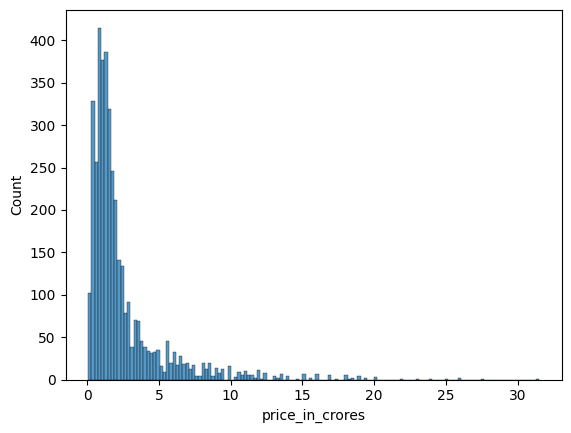

In [53]:
sns.histplot(data['price_in_crores'])

<Axes: xlabel='price_in_crores'>

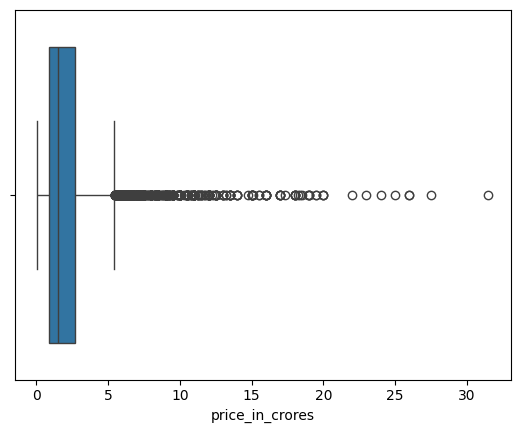

In [54]:
sns.boxplot(x=data['price_in_crores'])

#### removing outliers

In [55]:
data['price_in_crores'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3974 entries, 0 to 3973
Series name: price_in_crores
Non-Null Count  Dtype  
--------------  -----  
3954 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB


In [56]:
q1 = data['price_in_crores'].quantile(0.25)
q3 = data['price_in_crores'].quantile(0.75)
iqr = q3-q1

lower_bound = q1 - iqr * 1.5
upper_bound = q3 + iqr * 1.5

data.shape[0], '-->',data[(data['price_in_crores']>lower_bound) & (data['price_in_crores']<upper_bound)].shape[0]

(3974, '-->', 3503)

In [57]:
# analyzing outlier records
outlier_records = data[(data['price_in_crores']<lower_bound) | (data['price_in_crores']>upper_bound)]

In [58]:
outlier_records['price_in_crores'].describe()

count    448.000000
mean       9.161004
std        4.041683
min        5.460000
25%        6.300000
50%        8.000000
75%       10.550000
max       31.500000
Name: price_in_crores, dtype: float64

In [59]:
# removing outliers
data = data[(data['price_in_crores']>lower_bound) & (data['price_in_crores']<upper_bound)]
data.head(3)

,property_name,sector,society,price_in_crores,price_per_sqft,bedRoom,bathroom,balcony,address,floorNum,facing,agePossession,nearbyLocations,description,features,rating,property_type,noOfFloor,SuperBuiltupArea_sqft,BuiltupArea_sqft,CarpetArea_sqft,servantRoom,studyRoom,poojaRoom,storeRoom,otherAdditionalRoom,luxury_class
0,2 BHK Flat in Sector 70 Gurgaon,sector 70,shree vardhman victoria,1.10,8461.0,2.0,2.0,2,"Sector 70 Gurgaon, Gurgaon, Haryana",8.0,north-east,Very Recent Construction,"['Airia Mall', 'Golf Course Extn Road', 'Sohna...",Square yards rera reg.\r\nHrera 660/2017/307\r...,"['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area5 out of 5', 'Construction5 out of...",flat,1.0,NaN,NaN,1299.957411,False,False,False,False,False,0
1,3 Bedroom House for sale in Sector 40 Gurgaon,sector 40,NaN,2.15,23889.0,3.0,3.0,3,"Sector 40 Gurgaon, Gurgaon, Haryana",0.0,NaN,Recent Construction,"['Huda city centre metro station', 'Axis bank ...",Its just behind ryan international school and ...,"['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle4 out of 5...",house,3.0,NaN,900.0,NaN,False,True,True,True,False,0
3,4 BHK Flat in Sector 69 Gurgaon,sector 69,tulip violet,1.70,8445.0,4.0,4.0,2,"701, Sector 69 Gurgaon, Gurgaon, Haryana",7.0,west,Very Recent Construction,"['Airia Mall Sector 68', 'Southern Peripheral ...",Tulip violet is one of gurgaon's most sought a...,"['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area5 out of 5', 'Construction4 out of...",flat,1.0,2010.0,NaN,NaN,False,False,False,False,False,0
